# The Scikit-learn Python Library

[Official Website](https://scikit-learn.org/stable/index.html)

# DecisionTreeRegressor - Decision Tree Algorithm
## Forest Fire Dataset
https://archive.ics.uci.edu/ml/datasets/Forest+Fires
### Goal is to predict the burned area of forest fires
https://scikit-learn.org/stable/modules/tree.html#tree

<br>

<br>

### Setup

***

In [168]:
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Fancier, statistical plots.
import seaborn as sns

# Functions creating iterators for efficient looping
from itertools import combinations

In [169]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Using seaborn style
plt.style.use('seaborn')

<br>

### Uploading and Enchancing the Forest Fire Data Set

***

In [170]:
# Loading the forest fire data set
df = pd.read_csv("https://raw.githubusercontent.com/Pasha-Akito/Emerging-Technologies-Assessment/main/forestfires.csv");

In [171]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


### Explaining the Column names
- X
    * X coordinate of the Monteshinho park 
- Y
    * Y coordinate of the Monteshinho park
- Month
    * Month of the year
- Day
    * Day of the week
- FFMC
    * Fine Fuel Moisture Code. Represents fuel moisture of forest litter fuels under the shade of a forest canopy
- DMC
    * Duff Moisture Code. Represents fuel moisture of decomposed organic material underneath the litter
- DC
    * Drought Code. Represents drying deep in the soil
- ISI
    * Initial Spread Index. Integrates fuel moisture for fine dead fuels and surface windspeed to estimate a spread potential
- Temp
    * Temperature in Celsius degrees
- RH
    * Relative Humidity in percent
- Wind
    * Wind speed in km/h
- Rain
    * Outside rain in mm/m2
- Area
    * The burned area of the forest (in ha)

In [172]:
# Encoding the data so we can read it

# Replacing the month values with integer values corresponding to their position on the calender starting with Janurary
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
# Replacing the day values with itneger values corresponding to tehir position on the calender starting with Monday
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [173]:
# Summary statistics
df.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [174]:
# Checking for Missing Values
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

<br>

### Data Visualisation

***

This dataset has many differnet features. Finding the best ways to plot these data points will help us understand what relationship the features have with each other. <br>
Lets find out what we can learn from this dataset. <br>

Lets start with the target variable, area

<AxesSubplot:xlabel='area', ylabel='Density'>

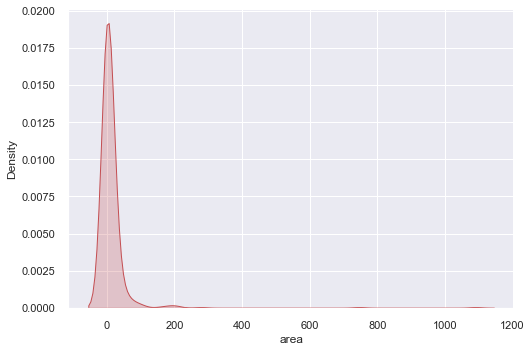

In [175]:
# Distribution of Burned Area
sns.set(font_scale=1)
sns.kdeplot(df['area'], shade=True , color='r')

Most of the dataset values fall between 0 and 200 of the area feature. <br>
With majority being less than 100 <br>
Lets plot the distribution reported fires by the month

<AxesSubplot:xlabel='month', ylabel='count'>

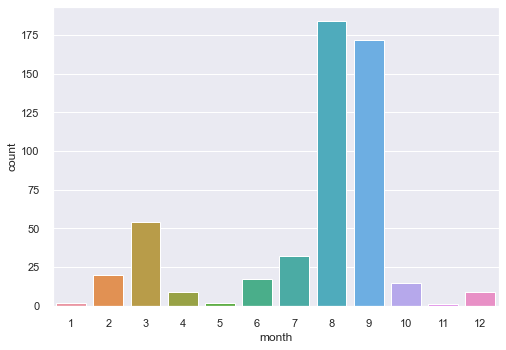

In [176]:
# Distribution of burned area
sns.countplot(data = df, x = df['month'])

From observing the graph, months August (8) and September (9) have the biggest amount of reported fires. <br>
Lets plot a heatmap to try find the biggest attribute correlating with the burned area.

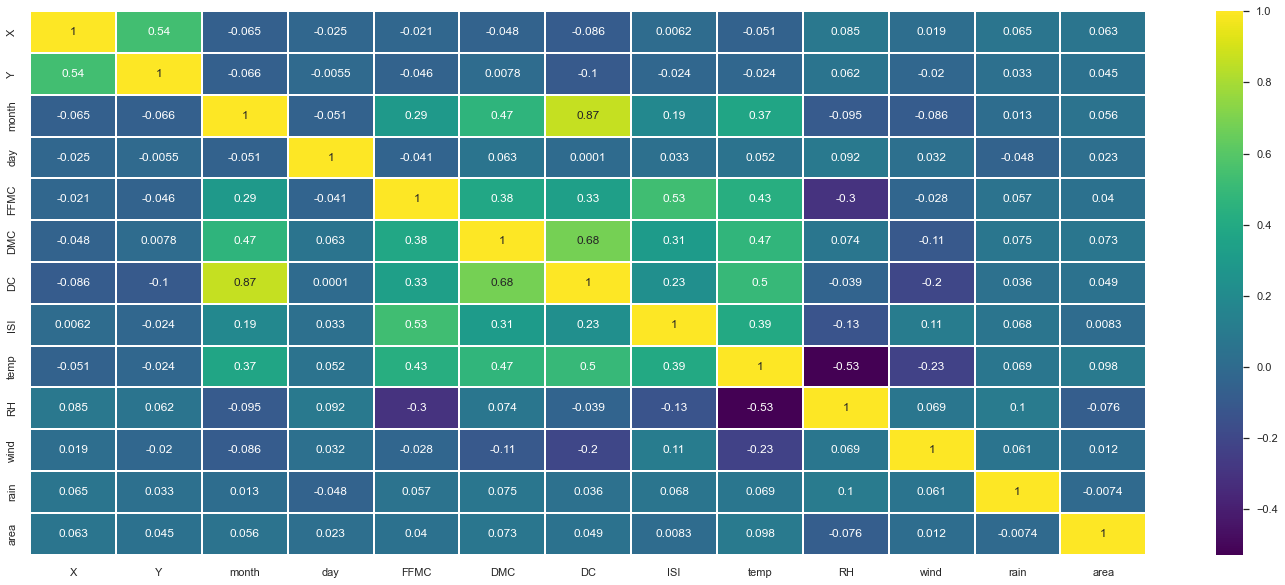

In [177]:
# Using heatmap to plot all the features against each other
f, ax = plt.subplots(figsize = (25, 10))
sns.heatmap(df.corr(), annot = True, linewidths=2, ax=ax, cmap = "viridis")

plt.show()

Temp has the biggest correlation with area. Rain and RH has the least correlation which would make sense in a forest fire. <br>
Lets try and find what correlates with temp the most. This would tell us what attributes need to be present for there to be a forest fire

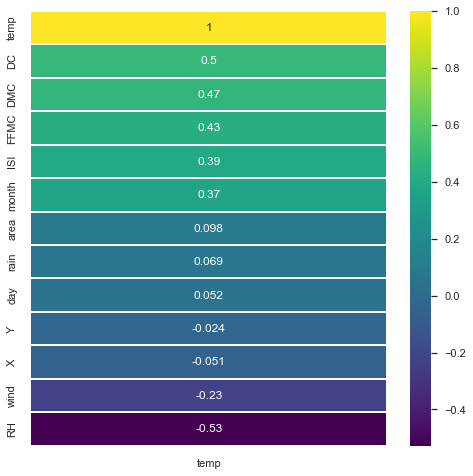

In [178]:
# Correlating the dataset with temp to better see information
f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(df.corr()[['temp']].sort_values(by='temp', ascending=False), annot = True, linewidths=2, ax=ax, cmap = "viridis")

plt.show()

This graph tells us a lot about the relationship temp has with the dataset. <br>
These are the distinct attributes: <br> <br>
In order for a fire to start... <br>
- DC
    * the soil has to be very dry
- DMC
    * Water content of decomposed material under the litter must be low
- FFMC 
    * Water content of decomposed material under the shade must be low
- ISI
    * Ability for a fire to spread
- RH
    * Relative humidity has to be low

X, Y, Day, Month will be removed from the dataset when training our algorithm as they don't help with predicting forest fires.

<br>

# Test and Train Split

***

In [179]:
# Split the data frame in two
import sklearn.model_selection as mod

train, test = mod.train_test_split(df)

In [180]:
# Describing train
print(len(train), 'samples in training data')
train.describe()

387 samples in training data


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,4.713178,4.320413,7.330749,4.348837,90.355039,109.052713,534.867442,8.934625,18.541860,45.198966,4.056331,0.027390,13.968191
std,2.274642,1.209064,2.351091,2.079948,6.140872,65.574791,255.479590,4.734412,5.846469,16.425659,1.792682,0.341248,72.130889
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,17.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,58.650000,409.200000,6.300000,15.200000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,105.800000,654.100000,8.400000,19.100000,42.000000,4.000000,0.000000,0.210000
75%,7.000000,5.000000,9.000000,6.000000,92.600000,141.300000,709.900000,10.650000,22.450000,54.000000,5.400000,0.000000,6.070000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.100000,100.000000,9.400000,6.400000,1090.840000


In [181]:
# Describing Test
print(len(test), 'samples in test data')
test.describe()

130 samples in test data


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,4.538462,4.238462,7.907692,3.992308,91.506923,116.289231,586.856154,9.280769,19.923077,41.576923,3.902308,0.004615,9.510462
std,2.430918,1.292818,1.982271,2.036474,2.836725,59.173291,220.918456,3.999343,5.581205,15.742534,1.790520,0.039101,24.999999
min,1.000000,2.000000,2.000000,1.000000,81.600000,8.000000,30.200000,1.900000,4.600000,15.000000,0.900000,0.000000,0.000000
25%,2.000000,3.250000,8.000000,2.000000,90.900000,85.100000,580.775000,6.700000,17.025000,28.250000,2.200000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,4.000000,91.900000,114.900000,673.200000,8.400000,20.300000,39.000000,4.000000,0.000000,1.175000
75%,6.000000,5.000000,9.000000,6.000000,93.175000,145.400000,719.600000,11.375000,23.375000,50.750000,4.900000,0.000000,7.460000
max,9.000000,9.000000,12.000000,7.000000,96.200000,276.300000,825.100000,22.700000,33.300000,99.000000,8.900000,0.400000,185.760000


<br>

# Inputs and Outputs

***

In [182]:
#Setting up the inputs and outputs
values_df = df.values

inputs = values_df[:,0:12]
outputs = values_df[:,12]

In [183]:
# Describing inputs
inputs

array([[ 7. ,  5. ,  3. , ..., 51. ,  6.7,  0. ],
       [ 7. ,  4. , 10. , ..., 33. ,  0.9,  0. ],
       [ 7. ,  4. , 10. , ..., 33. ,  1.3,  0. ],
       ...,
       [ 7. ,  4. ,  8. , ..., 70. ,  6.7,  0. ],
       [ 1. ,  4. ,  8. , ..., 42. ,  4. ,  0. ],
       [ 6. ,  3. , 11. , ..., 31. ,  4.5,  0. ]])

In [184]:
# Describing outputs
outputs

array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.000

<br>

# DecisionTreeRegressor Model
***

In [185]:
# Importing our model
from sklearn.tree import DecisionTreeRegressor

# Creating our classifier
model = DecisionTreeRegressor()
# Training the classifier on our data
model.fit(inputs, outputs)

DecisionTreeRegressor()

In [186]:
# Asking the model to model the test data
predictions = model.predict(test[['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']].values)
predictions

array([1.4600e+00, 1.7500e+00, 1.7463e+02, 2.5700e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 4.4200e+00, 1.8576e+02, 2.8660e+01,
       1.1160e+01, 2.1300e+00, 9.0000e-02, 3.0700e+00, 2.4000e-01,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 7.2000e-01, 4.7000e-01,
       0.0000e+00, 1.6600e+00, 3.9300e+00, 4.4100e+00, 0.0000e+00,
       7.3000e+00, 2.3500e+00, 3.8480e+01, 4.9590e+01, 0.0000e+00,
       8.9800e+00, 0.0000e+00, 7.1600e+00, 2.7700e+00, 6.9600e+00,
       2.9300e+00, 2.0030e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 3.6850e+01, 0.0000e+00,
       6.4300e+00, 0.0000e+00, 4.0800e+00, 1.0900e+00, 7.4000e+00,
       5.6040e+01, 0.0000e+00, 0.0000e+00, 6.1000e-01, 0.0000e+00,
       1.7000e-01, 3.0900e+00, 1.0080e+01, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 6.3600e+00, 0.0000e+00, 2.3410e+01, 0.0000e+00,
       0.0000e+00, 4.0800e+00, 0.0000e+00, 6.8000e-01, 0.0000e+00,
       2.0000e+00, 2.6900e+00, 3.7710e+01, 0.0000e+00, 1.6000e

In [187]:
predictions == test['area']

153    True
366    True
377    True
170    True
481    True
       ... 
338    True
370    True
143    True
220    True
213    True
Name: area, Length: 130, dtype: bool

In [188]:
# What proportions were correct?
model.score(test[['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']].values, test['area'].values)

0.9981785152307329

Our Model (DecisionTreeRegressor) ended up with an accuracy of 99.9% <br>
This model is almost guaranteed to accurately predict thr burned area of forest fires

<br>

# End of DecisionTreeRegressor - Decision Tree Algorithm

<br>

***

<br>


# K-Means - Clustering Algorithm
## Household Power Consumption Dataset
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption
### Goal is to predict a short term forecast on electricity consumption 
https://scikit-learn.org/stable/modules/clustering.html#k-means


<br>

### Setup

***

In [2]:
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Fancier, statistical plots.
import seaborn as sns

# Functions creating iterators for efficient looping
from itertools import combinations

In [3]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Using seaborn style
plt.style.use('seaborn')

<br>

### Uploading and Enchancing the Household Data Set

***

In [4]:
# Loading the Household data set
df = pd.read_csv("https://raw.githubusercontent.com/Pasha-Akito/Emerging-Technologies-Assessment/main/household.csv", sep = ';',
                parse_dates = {'dt':['Date','Time']},
                infer_datetime_format = True,
                low_memory = False, na_values = ['nan','?'],
                index_col = 'dt');

In [5]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2007-12-31 23:55:00,1.746,0.204,242.41,7.2,0.0,0.0,18.0
2007-12-31 23:56:00,1.732,0.210,242.42,7.2,0.0,0.0,18.0
2007-12-31 23:57:00,1.732,0.210,242.50,7.2,0.0,0.0,18.0


### Explaining the Column names
- dt
    * Date in format dd/mm/yyyy with time in format hh:mm:ss
- Global_active_power
    * Household global minute-averaged active power (in kilowatt)
- Global_reactive_power
    * household global minute-averaged reactive power (in kilowatt)
- Voltage
    * Minute-averaged voltage (in volt)
- Global_intensity
    * Household global minute-averaged current intensity (in ampere)
- Sub_metering_1
    * Energy sub-metering No. 1. It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave(hot plates are not electric but gas powered). (in watt-hour of active energy)
- Sub_metering_2
    * Energy sub-metering No. 2. It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light. (in watt-hour of active energy)
- Sub_metering_3
    * Energy sub-metering No. 3. It corresponds to an electric water-heater and an air-conditioner. (in watt-hour of active energy)

In [6]:
# Summary statistics
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,543661.000000,543661.000000,543661.000000,543661.000000,543661.000000,543661.000000,543661.000000
mean,1.148733,0.117932,239.467111,4.896593,1.232400,1.661094,5.859885
std,1.183593,0.108824,3.596600,4.994165,6.463654,6.809979,8.212383
min,0.082000,0.000000,223.490000,0.400000,0.000000,0.000000,0.000000
25%,0.282000,0.000000,237.010000,1.200000,0.000000,0.000000,0.000000
50%,0.544000,0.100000,239.800000,2.400000,0.000000,0.000000,0.000000
75%,1.592000,0.186000,241.930000,6.600000,0.000000,1.000000,17.000000
max,10.670000,1.148000,252.140000,46.400000,78.000000,78.000000,20.000000


In [7]:
# Checking for Missing Values
df.isnull().sum()

Global_active_power      3935
Global_reactive_power    3935
Voltage                  3935
Global_intensity         3935
Sub_metering_1           3935
Sub_metering_2           3935
Sub_metering_3           3935
dtype: int64

In [77]:
# Filling missing values with mean values
df = df.fillna(df.mean())
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

<br>

### Data Visualisation

***

Lets start with plotting the power usage mean per month.

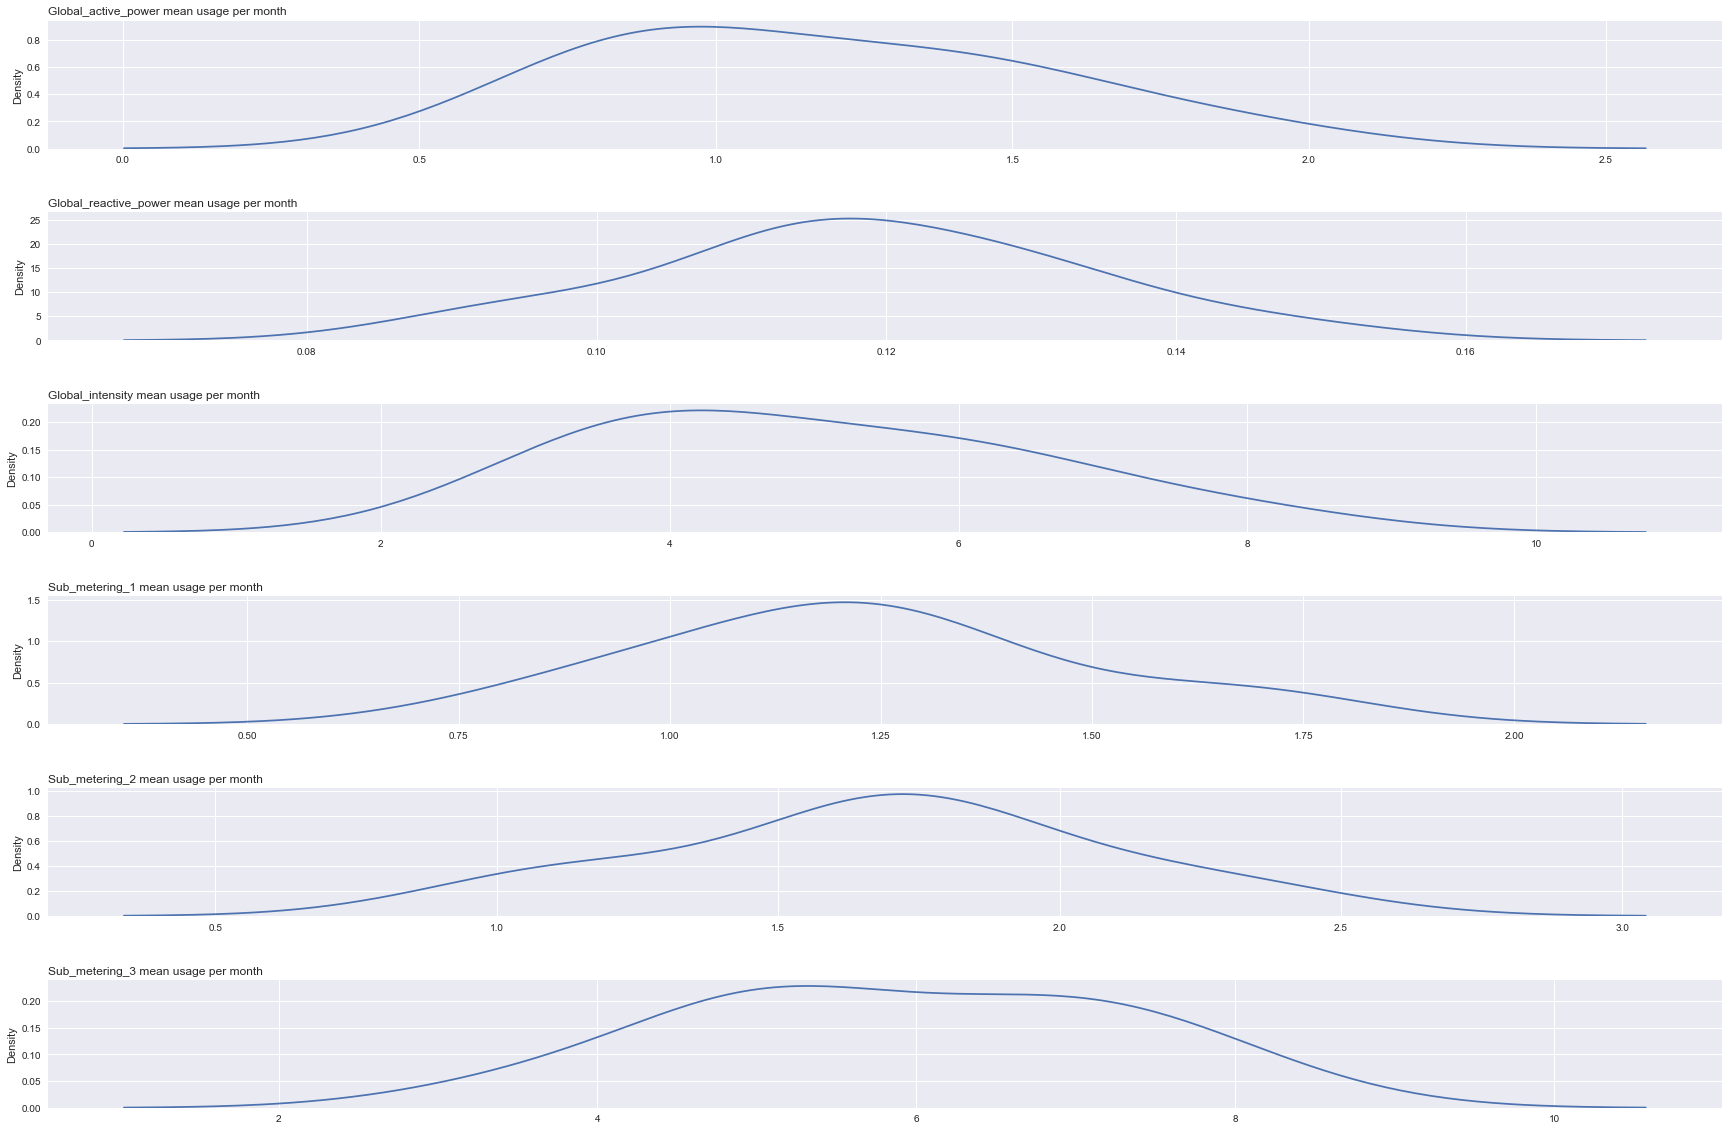

In [75]:
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(30, 20))
for col in cols:
    plt.subplot(len(cols), 1, i)
    sns.kdeplot(df.resample('M').mean().values[:, col])
    plt.title(df.columns[col] + ' mean usage per month', loc='left')
    i += 1
plt.subplots_adjust(hspace = 0.5)
plt.show()

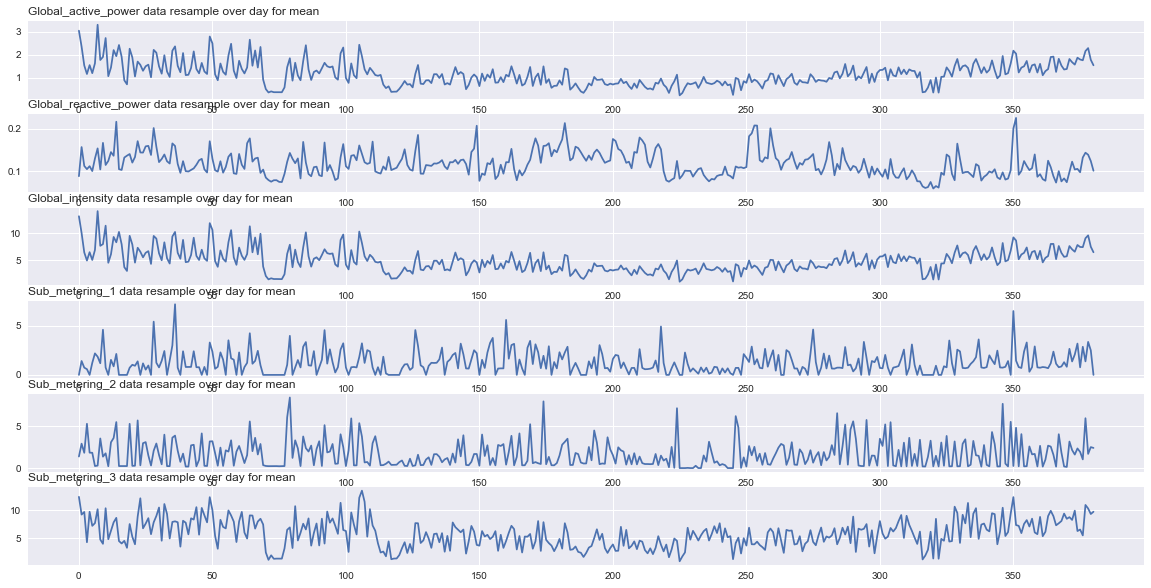

In [76]:
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('D').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over day for mean',loc='left')
    i += 1
plt.show()

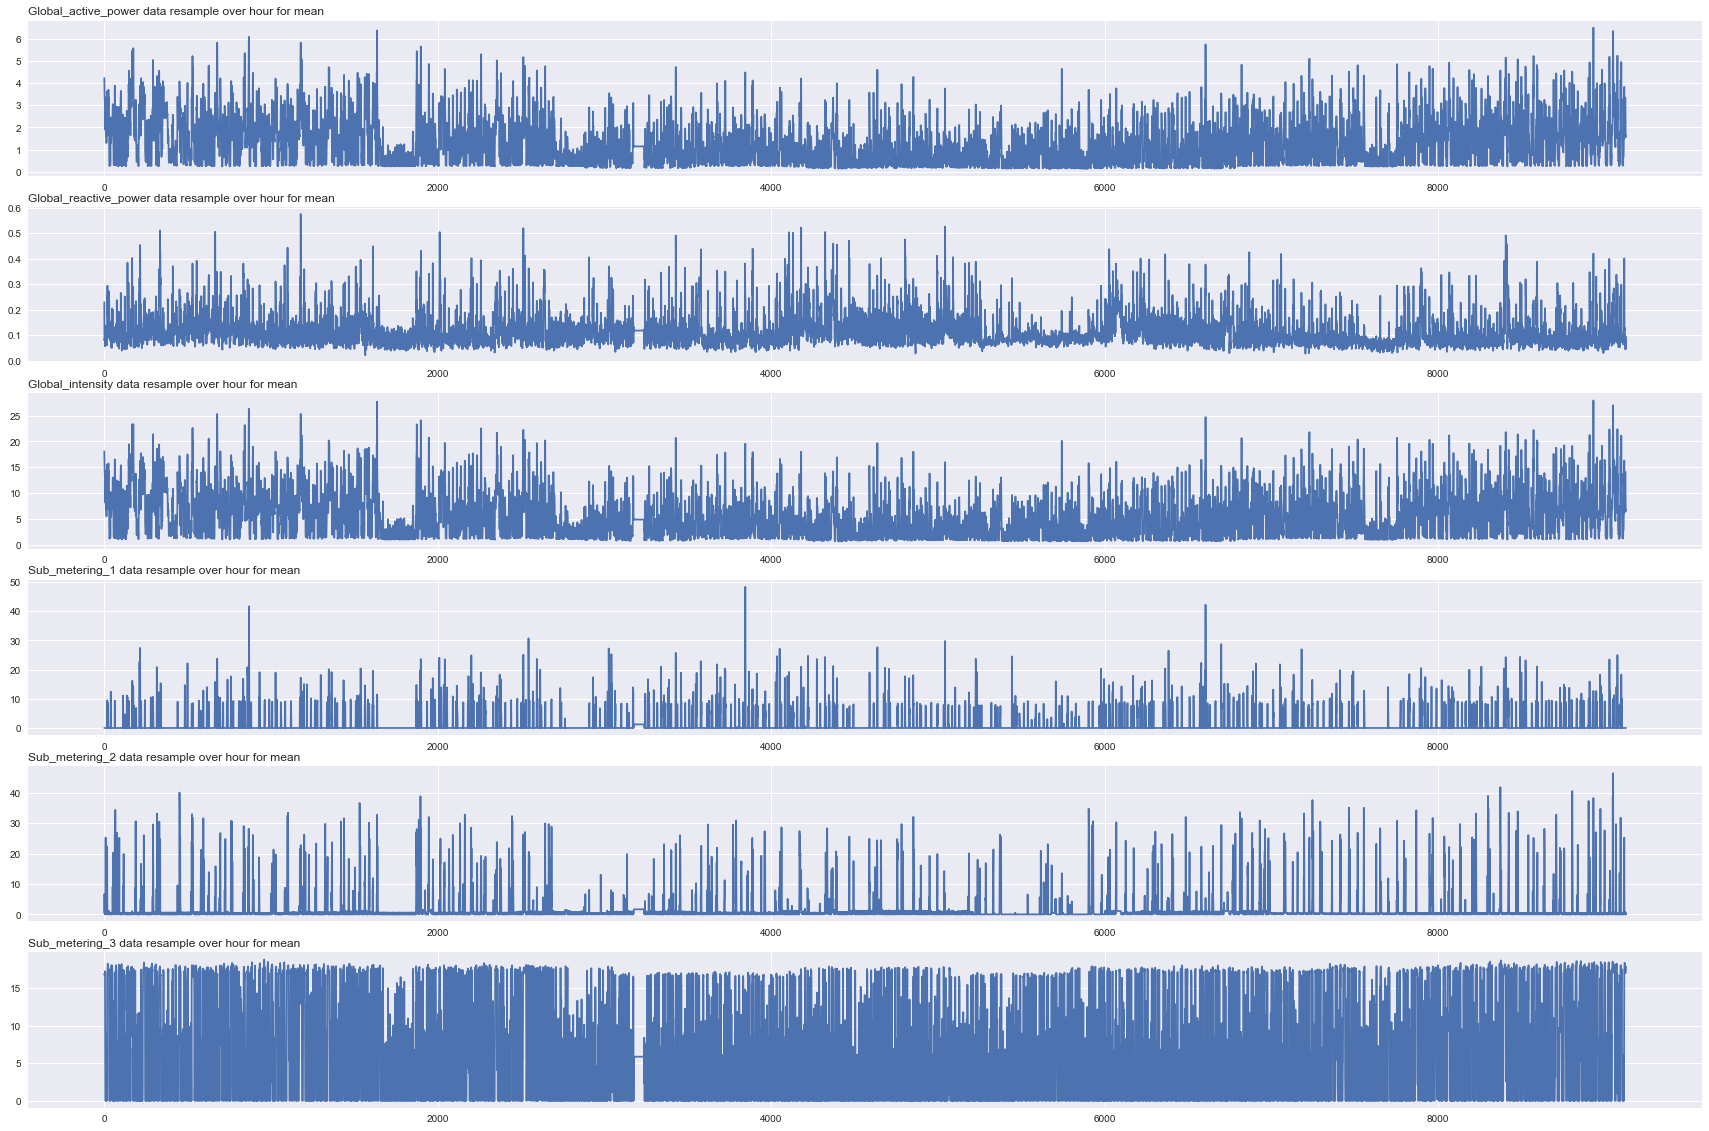

In [80]:
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(30, 20))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('H').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over hour for mean',loc='left')
    i += 1
plt.show()

In [81]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.267609,-0.344111,0.999050,0.464669,0.473004,0.617183
Global_reactive_power,0.267609,1.000000,-0.104136,0.283048,0.143128,0.156527,0.072288
Voltage,-0.344111,-0.104136,1.000000,-0.355230,-0.191671,-0.164731,-0.259165
Global_intensity,0.999050,0.283048,-0.355230,1.000000,0.469393,0.478672,0.606664
Sub_metering_1,0.464669,0.143128,-0.191671,0.469393,1.000000,0.061284,0.121140
Sub_metering_2,0.473004,0.156527,-0.164731,0.478672,0.061284,1.000000,0.123737
Sub_metering_3,0.617183,0.072288,-0.259165,0.606664,0.121140,0.123737,1.000000


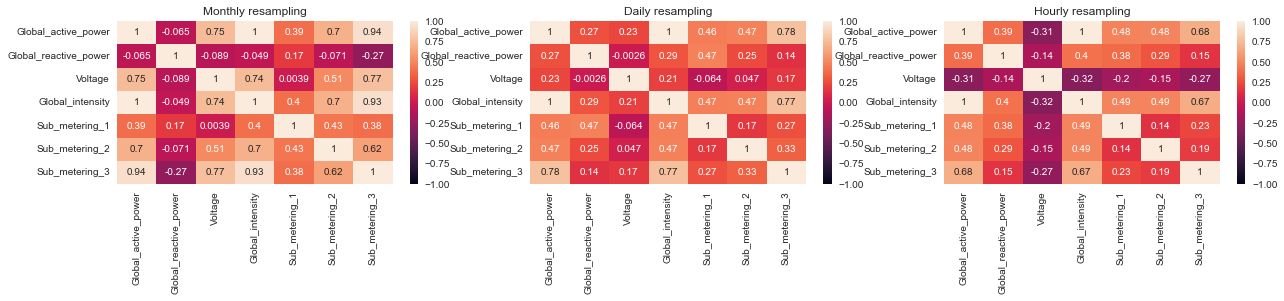

In [82]:
f= plt.figure(figsize=(21,3))

ax=f.add_subplot(131)
dfm = df.resample('M').mean()
sns.heatmap(dfm.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Monthly resampling', size=12)

ax=f.add_subplot(132)
dfd = df.resample('D').mean()
sns.heatmap(dfd.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Daily resampling', size=12)
  
ax=f.add_subplot(133)
dfh = df.resample('H').mean()
sns.heatmap(dfh.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Hourly resampling', size=12)
plt.show()

<br>

# End of K-Means - Clustering Algorithm

<br>

***

<br>

# LinearSVC - Support Vector Machine Algorithm
## Wine Dataset
https://archive.ics.uci.edu/ml/datasets/Wine
### Goal is to use chemical analysis to determine the origin of wines
https://scikit-learn.org/stable/modules/svm.html#svm-classification
***

## Setup


In [189]:
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Fancier, statistical plots.
import seaborn as sns

# Functions creating iterators for efficient looping
from itertools import combinations

In [190]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Using seaborn style
plt.style.use('seaborn')

<br>

### Uploading and Enchancing the Wine Data Set

***

In [191]:
# Loading the wine data set
df = pd.read_csv("https://raw.githubusercontent.com/Pasha-Akito/Emerging-Technologies-Assessment/main/wine.csv", header = None);

In [192]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [193]:
# Adding headers to the dataset
df.columns = [  'type','alcohol','malic acid','ash','alcalinity','magnesium','total phenols',
              'flavanoids','nonflavanoid phenols','proanthocyanins','colour intensity','hue','od280/od315','proline']
df

,type,alcohol,malic acid,ash,alcalinity,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,colour intensity,hue,od280/od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [194]:
# Summary statistics
df.describe()

,type,alcohol,malic acid,ash,alcalinity,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,colour intensity,hue,od280/od315,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [195]:
# Checking for Missing Values
df.isnull().sum()

type                    0
alcohol                 0
malic acid              0
ash                     0
alcalinity              0
magnesium               0
total phenols           0
flavanoids              0
nonflavanoid phenols    0
proanthocyanins         0
colour intensity        0
hue                     0
od280/od315             0
proline                 0
dtype: int64

<br>

### Data Visualisation

***

This data set has many different features. Finding the best ways to plot these data points will help us understand the relationship between the attributes and types of wine which will help us analyse the dataset better. I think the correlation heatmap would work in this situation to showcase the relationship between the attributes.

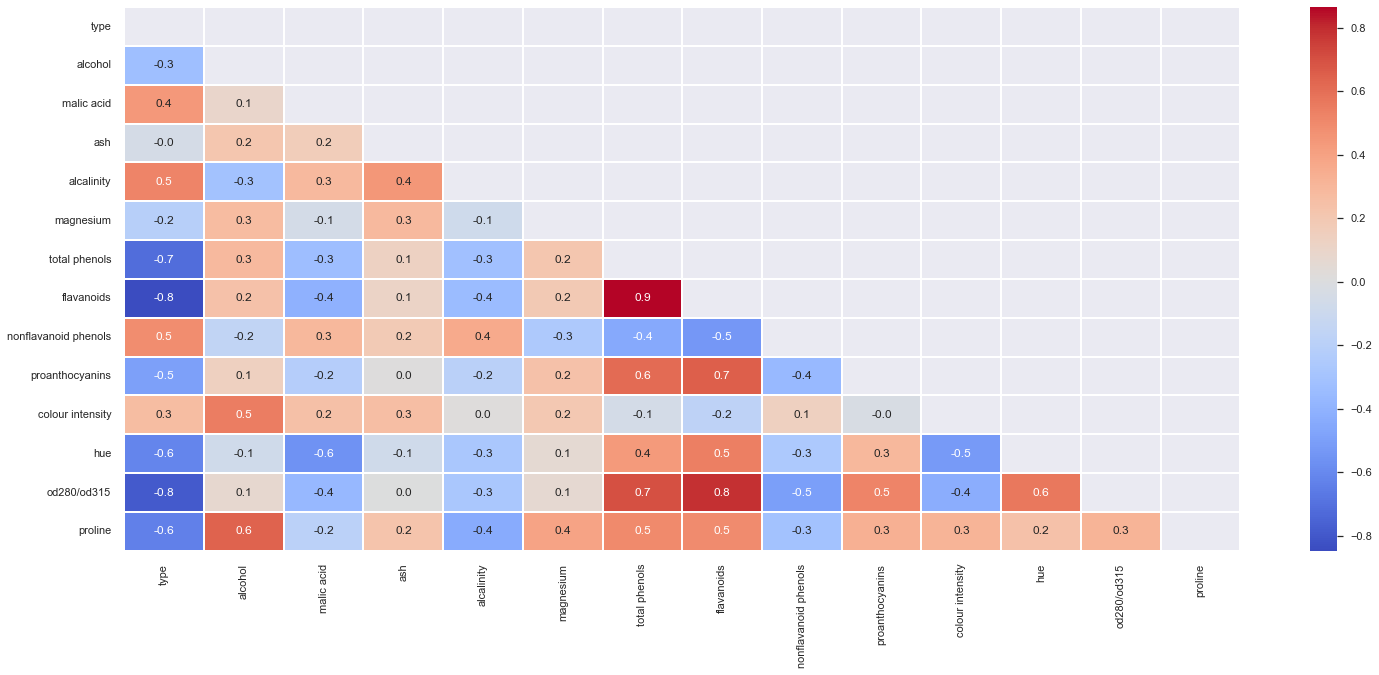

In [196]:
# Using heatmap to plot all the features against each other
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.set(font_scale=1)
f, ax = plt.subplots(figsize = (25, 10))
sns.heatmap(df.corr(), annot = True, linewidths=2, fmt = ".1f", ax=ax, cmap = "coolwarm", mask = mask)

plt.show()

<br><br>
This doesn't tell us much actually... There is nothing differentiating the three types of wine and so the relationship between attributes doesn't tell us much <br><br>
What I've chosen to do here now, is split the three different types of wines into their own dataframe so we can analyse the heatmaps individually. <br>
This should tell us a good amount about each type of wine and their relationship with each attribute <br>

Before we do this, we want to correlate each type of wine by an attribute. I'll start by using pairplot to plot all the features against each other and grouping the data points by type of wine. I'll then look at the kdeplot for each attribute and pick the attribute that visually has the biggest difference between each type of wine. <br>
We'll correlate each attribute by the chosen attribute and derive information about the relationship between each type of wine and their attributes. <br>
By doing so, we can find out what attributes are the most unique in each type of wine


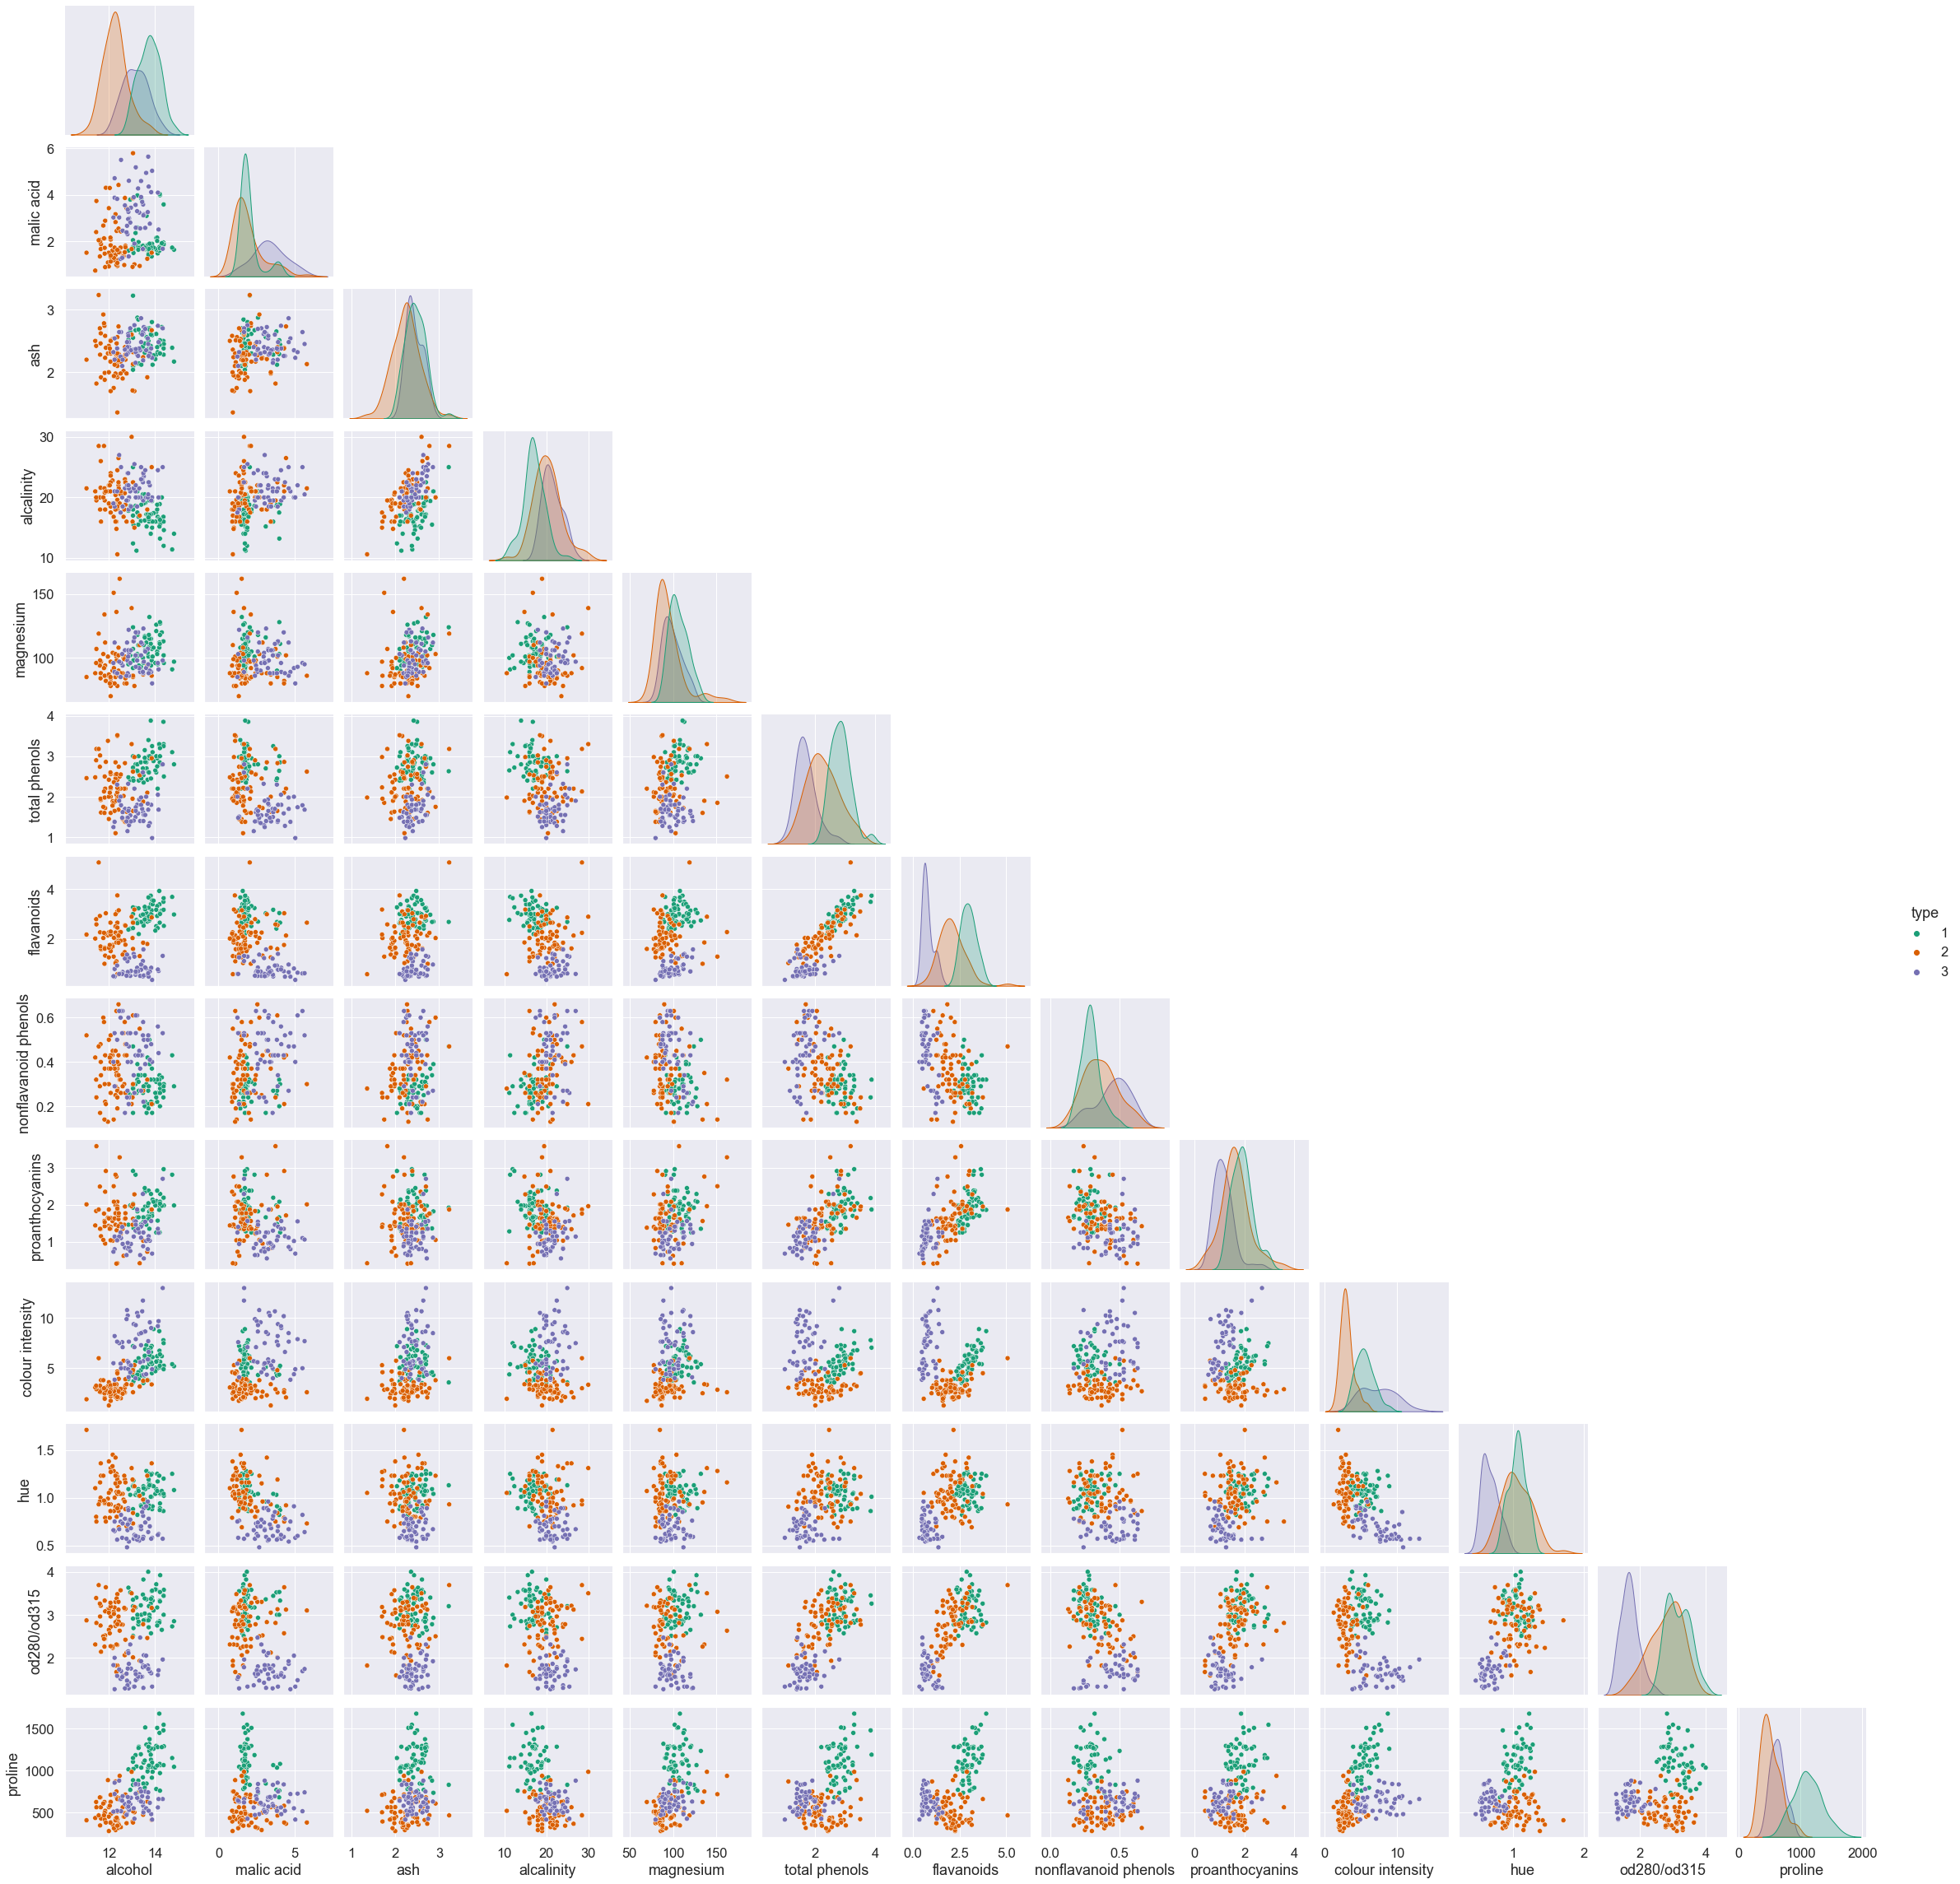

In [197]:
# Using pairplot plotting all the features against each other and grouping the data points by class
sns.set(font_scale=1.5)
sns.pairplot(df, hue='type', palette = "Dark2", corner = True);

It can be hard to analyse so many pair plots but the flavanoids kde plot seems to be the most visually distinct by type so the flavanoids will be our chosen attribute to correlate types by <br>
I'm now going to plot the flavanoids attribute using a distribution graph

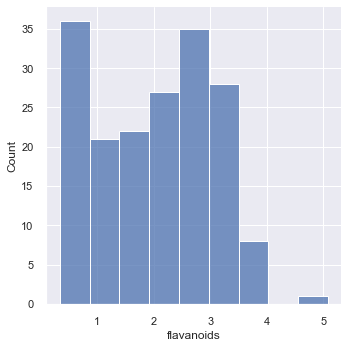

In [198]:
# Distribution of flavanoids content
sns.set(font_scale=1)
sns.displot(df['flavanoids'], kde = 0)

There's a good density and unique distribution of flavanoids content. Let's split it into the three types of wine and see if there's a difference between types

<AxesSubplot:xlabel='flavanoids', ylabel='Density'>

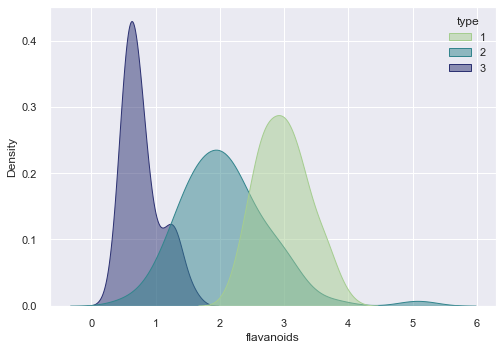

In [199]:
# Distribution of flavanoids content by class
sns.kdeplot(data = df, x = "flavanoids", hue = "type", fill = True, palette="crest", alpha = 0.5)

From observing this graph, we can tell that each type of wine has a very distinct flavanoids content. <br>
This is a good attribute to correlate our heatmaps with

In [200]:
# Setting up first type of wine
type1_df = df[df.type == 1]
type1_df = type1_df.drop('type', axis = 1)
type1_df.describe()

,alcohol,malic acid,ash,alcalinity,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,colour intensity,hue,od280/od315,proline
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
std,0.462125,0.688549,0.227166,2.546322,10.498949,0.338961,0.397494,0.070049,0.412109,1.238573,0.116483,0.357077,221.520767
min,12.850000,1.350000,2.040000,11.200000,89.000000,2.200000,2.190000,0.170000,1.250000,3.520000,0.820000,2.510000,680.000000
25%,13.400000,1.665000,2.295000,16.000000,98.000000,2.600000,2.680000,0.255000,1.640000,4.550000,0.995000,2.870000,987.500000
50%,13.750000,1.770000,2.440000,16.800000,104.000000,2.800000,2.980000,0.290000,1.870000,5.400000,1.070000,3.170000,1095.000000
75%,14.100000,1.935000,2.615000,18.700000,114.000000,3.000000,3.245000,0.320000,2.090000,6.225000,1.130000,3.420000,1280.000000
max,14.830000,4.040000,3.220000,25.000000,132.000000,3.880000,3.930000,0.500000,2.960000,8.900000,1.280000,4.000000,1680.000000


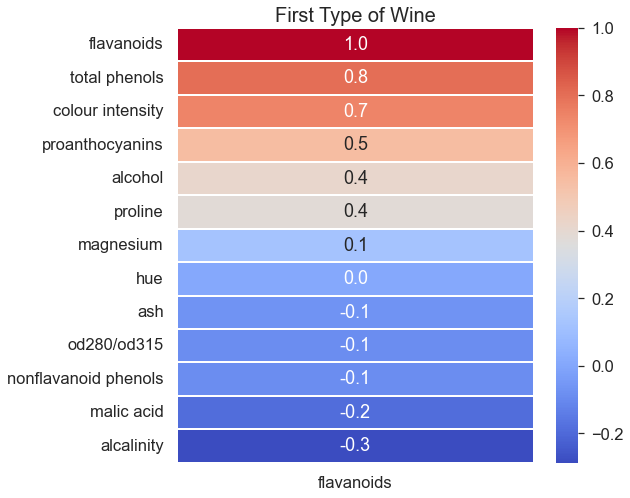

In [201]:
# Plotting first type of wine
# Correlating it with flavanoids to better see the information
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(type1_df.corr()[['flavanoids']].sort_values(by='flavanoids', ascending=False), annot = True, linewidths=2, fmt = ".1f", ax=ax, cmap = "coolwarm")

plt.title("First Type of Wine", fontsize = 20)
plt.show()

From observing the graph, this is what we can tell from the first type of wine
- Its high in (0.5 - 1.0)
    * Toal Phenols
    * Colour Intensity
    * Proanthocyanins
<br>
- Its moderately high in (0.2 - 0.4)
    * Alcohol
    * Proline
<br>
- Its moderate in (-0.1 - 0.1)
    * Magnesium
    * Hue
    * Ash
    * OD280/OD315
    * Nonflavanoid Phenols
<br>
- Its moderately low in (-0.2 - -0.4)
    * Malic Acid
    * Alcalinity


In [202]:
# Setting up second type of wine
type2_df = df[df.type == 2]
type2_df = type2_df.drop('type', axis = 1)
type2_df.describe()

,alcohol,malic acid,ash,alcalinity,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,colour intensity,hue,od280/od315,proline
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
std,0.537964,1.015569,0.315467,3.349770,16.753497,0.545361,0.705701,0.123961,0.602068,0.924929,0.202937,0.496573,157.211220
min,11.030000,0.740000,1.360000,10.600000,70.000000,1.100000,0.570000,0.130000,0.410000,1.280000,0.690000,1.590000,278.000000
25%,11.915000,1.270000,2.000000,18.000000,85.500000,1.895000,1.605000,0.270000,1.350000,2.535000,0.925000,2.440000,406.500000
50%,12.290000,1.610000,2.240000,20.000000,88.000000,2.200000,2.030000,0.370000,1.610000,2.900000,1.040000,2.830000,495.000000
75%,12.515000,2.145000,2.420000,22.000000,99.500000,2.560000,2.475000,0.430000,1.885000,3.400000,1.205000,3.160000,625.000000
max,13.860000,5.800000,3.230000,30.000000,162.000000,3.520000,5.080000,0.660000,3.580000,6.000000,1.710000,3.690000,985.000000


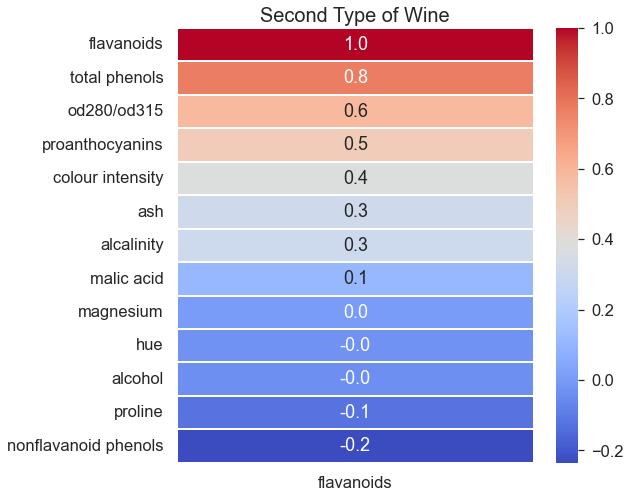

In [203]:
# Plotting second type of wine
# Correlating it with flavanoids to better see the information

f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(type2_df.corr()[['flavanoids']].sort_values(by='flavanoids', ascending=False), annot = True, linewidths=2, fmt = ".1f", ax=ax, cmap = "coolwarm")

plt.title("Second Type of Wine", fontsize = 20)
plt.show()

From observing the graph, this is what we can tell from the second type of wine
- Its high in (0.5 - 1.0)
    * Toal Phenols
    * OD280/OD315
    * Proanthocyanins
<br>
- Its moderately high in (0.2 - 0.4)
    * Colour Intensity
    * Ash
    * Alcalinity
<br>
- Its moderate in (-0.1 - 0.1)
    * Malic Acid
    * Magnesium
    * Hue
    * Alcohol
    * Proline
<br>
- Its moderately low in (-0.2 - -0.4)
    * Nonflavanoid Phenols

In [204]:
# Setting up third type of wine
type3_df = df[df.type == 3]
type3_df = type3_df.drop('type', axis = 1)
type3_df.describe()

,alcohol,malic acid,ash,alcalinity,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,colour intensity,hue,od280/od315,proline
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.44750,1.153542,7.396250,0.682708,1.683542,629.895833
std,0.530241,1.087906,0.184690,2.258161,10.890473,0.356971,0.293504,0.12414,0.408836,2.310942,0.114441,0.272111,115.097043
min,12.200000,1.240000,2.100000,17.500000,80.000000,0.980000,0.340000,0.17000,0.550000,3.850000,0.480000,1.270000,415.000000
25%,12.805000,2.587500,2.300000,20.000000,89.750000,1.407500,0.580000,0.39750,0.855000,5.437500,0.587500,1.510000,545.000000
50%,13.165000,3.265000,2.380000,21.000000,97.000000,1.635000,0.685000,0.47000,1.105000,7.550000,0.665000,1.660000,627.500000
75%,13.505000,3.957500,2.602500,23.000000,106.000000,1.807500,0.920000,0.53000,1.350000,9.225000,0.752500,1.820000,695.000000
max,14.340000,5.650000,2.860000,27.000000,123.000000,2.800000,1.570000,0.63000,2.700000,13.000000,0.960000,2.470000,880.000000


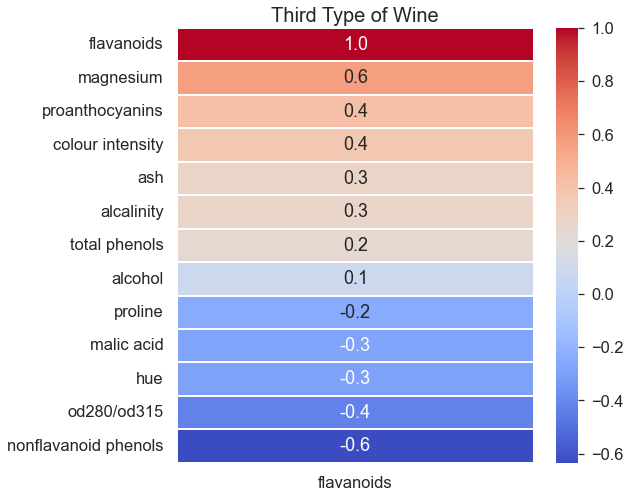

In [205]:
# Plotting third type of wine
# Correlating it with flavanoids to better see the information

f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(type3_df.corr()[['flavanoids']].sort_values(by='flavanoids', ascending=False), annot = True, linewidths=2, fmt = ".1f", ax=ax, cmap = "coolwarm")

plt.title("Third Type of Wine", fontsize = 20)
plt.show()

From observing the graph, this is what we can tell from the third type of wine
- Its high in (0.5  -  1.0)
    * Magnesium
<br>
- Its moderately high in (0.2  -  0.4)
    * Proanthocyanins
    * Colour Intensity
    * Ash
    * Alcalinity
    * Total Phenols
<br>
- Its moderate in (-0.1  -  0.1)
    * Alcohol
<br>
- Its moderately low in (-0.2  -  -0.4)
    * Proline
    * Malic Acid
    * Hue
    * OD280/OD315
<br>
- Its low in (-0.5  -  -1.0)
    * Nonflavanoid Phenols

This tells us a good bit about each type of wine by their flavanoids level <br>
I'm going to visualise these three heatmaps next to each other so it's easier to pick out the more differentiating features for each wine

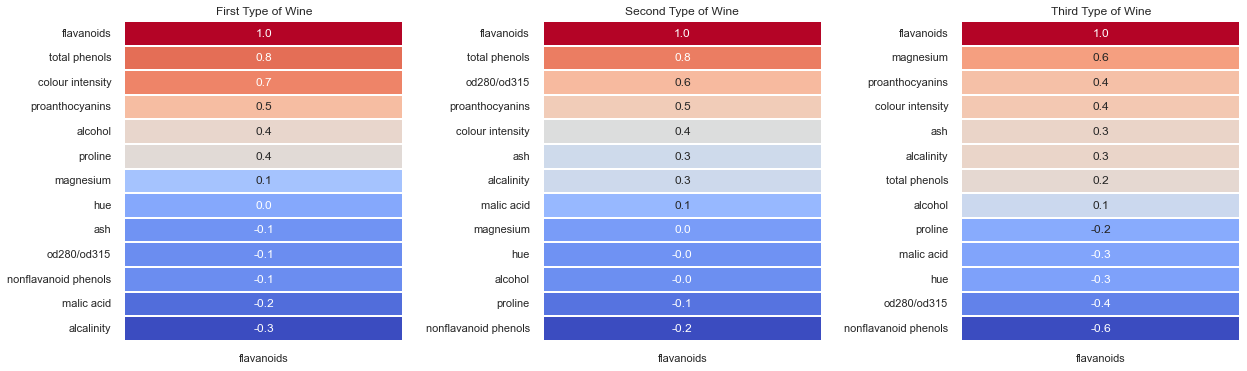

In [206]:
# Plotting each type of wine next to each other
# Correlating it with flavanoids to keep information consistent 
sns.set(font_scale=1)
fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)

plt.subplots_adjust(wspace = 0.5)
ax1.set_title("First Type of Wine")
sns.heatmap(type1_df.corr()[['flavanoids']].sort_values(by='flavanoids', ascending=False), annot=True, linewidths=2, fmt = ".1f", ax=ax1, cmap = "coolwarm", cbar = False)
ax2.set_title("Second Type of Wine")
sns.heatmap(type2_df.corr()[['flavanoids']].sort_values(by='flavanoids', ascending=False), annot=True, linewidths=2, fmt = ".1f", ax=ax2, cmap = "coolwarm", cbar = False)
ax3.set_title("Third Type of Wine")
sns.heatmap(type3_df.corr()[['flavanoids']].sort_values(by='flavanoids', ascending=False), annot=True, linewidths=2, fmt = ".1f", ax=ax3, cmap = "coolwarm", cbar = False)

plt.show()

By observing the graph, we will be able tell each type of wine by their most distinct attributes. <br>
But also we can then remove all of the least distinct attributes as they won't help us in identifying the types of wine. <br>
We will use this to better teach our algorithm and hopefully achieve a higher accuracy result with it. <br>

## Total Phenols
* Type 1
    - 0.8
* Type 2
    - 0.8
* Type 3 
    - 0.2 
<br>

Type 3 has less total phenols when correlated by flavanoids

<AxesSubplot:xlabel='total phenols', ylabel='Count'>

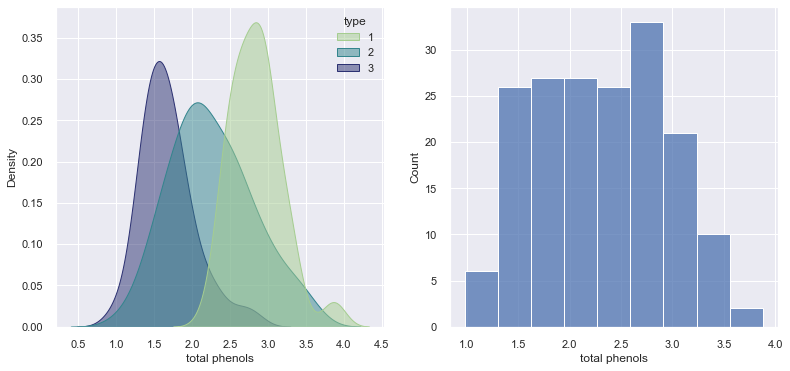

In [207]:
fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)

# Distribution of total phenols content by class
sns.kdeplot(data = df, x = "total phenols", hue = "type", fill = True, palette="crest", alpha = 0.5, ax = ax1)
# Distribution of total phenols content
sns.histplot(df['total phenols'], kde = 0, ax = ax2)

## Colour Intensity
* Type 1
    - 0.7
* Type 2
    - 0.4
* Type 3 
    - 0.4
<br>

Type 1 has more total phenols when correlated by flavanoids

<AxesSubplot:xlabel='colour intensity', ylabel='Count'>

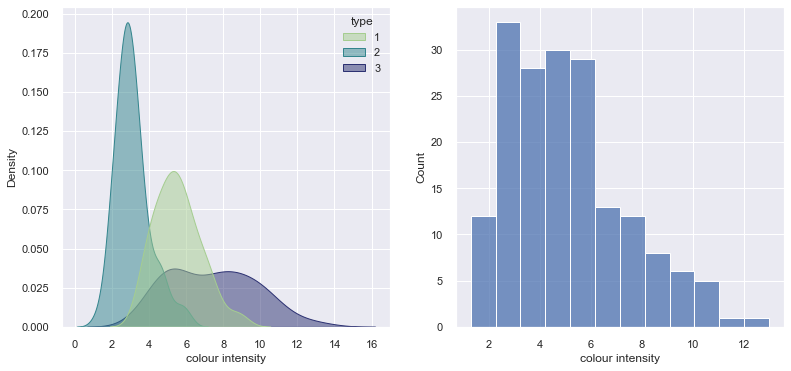

In [208]:
fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)

# Distribution of colour intensity content by class
sns.kdeplot(data = df, x = "colour intensity", hue = "type", fill = True, palette="crest", alpha = 0.5, ax = ax1)
# Distribution of colour intensity content
sns.histplot(df['colour intensity'], kde = 0, ax = ax2)

## Proanthocyanins
* Type 1
    - 0.5
* Type 2
    - 0.5
* Type 3 
    - 0.4
<br>

All types have a similar proanthocyanins content when correlated by flavanoids

<AxesSubplot:xlabel='proanthocyanins', ylabel='Count'>

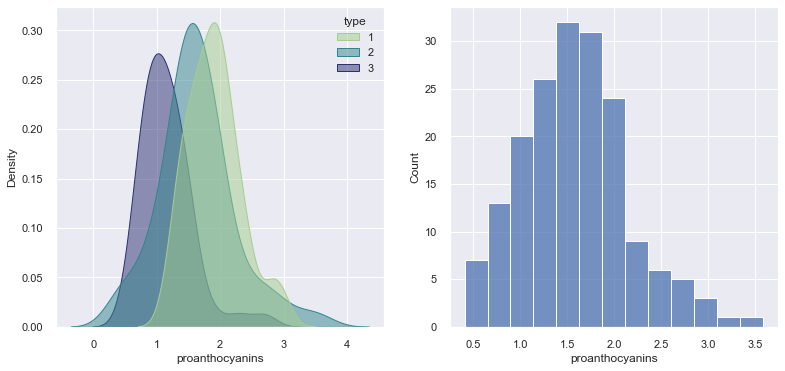

In [209]:
fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)

# Distribution of proanthocyanins content by class
sns.kdeplot(data = df, x = "proanthocyanins", hue = "type", fill = True, palette="crest", alpha = 0.5, ax = ax1)
# Distribution of proanthocyanins content
sns.histplot(df['proanthocyanins'], kde = 0, ax = ax2)

Proanthocyanins isn't very distinct between types, this might be the first attribute to go

## Alcohol
* Type 1
    - 0.4
* Type 2
    - 0.0
* Type 3 
    - 0.1
<br>

Type 1 has a more alcohol content  when correlated by flavanoids

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

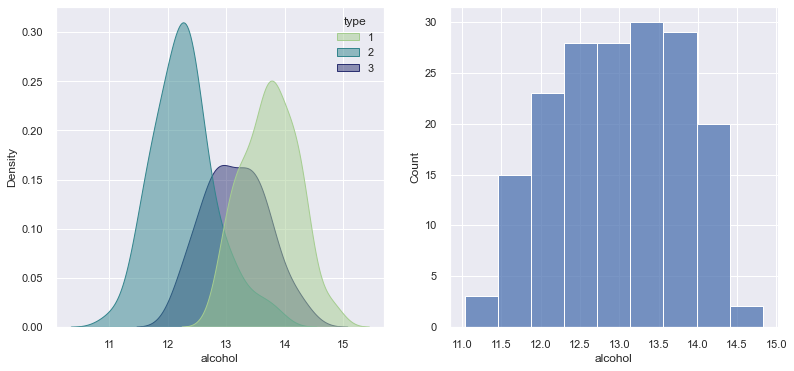

In [210]:
fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)

# Distribution of alcohol content by class
sns.kdeplot(data = df, x = "alcohol", hue = "type", fill = True, palette="crest", alpha = 0.5, ax = ax1)
# Distribution of alcohol content
sns.histplot(df['alcohol'], kde = 0, ax = ax2)

## Proline
* Type 1
    - 0.4
* Type 2
    - -0.1
* Type 3 
    - -0.2
<br>

Type 1 has a more proline content when correlated by flavanoids

<AxesSubplot:xlabel='proline', ylabel='Count'>

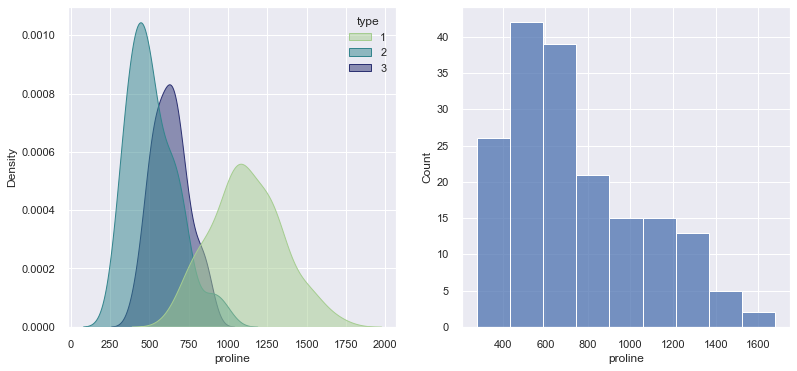

In [211]:
fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)

# Distribution of proline content by class
sns.kdeplot(data = df, x = "proline", hue = "type", fill = True, palette="crest", alpha = 0.5, ax = ax1)
# Distribution of proline content
sns.histplot(df['proline'], kde = 0, ax = ax2)

## Magnesium
* Type 1
    - 0.1
* Type 2
    - 0.0
* Type 3 
    - 0.6
<br>

Type 3 has much more magnesium content when correlated by flavanoids

<AxesSubplot:xlabel='magnesium', ylabel='Count'>

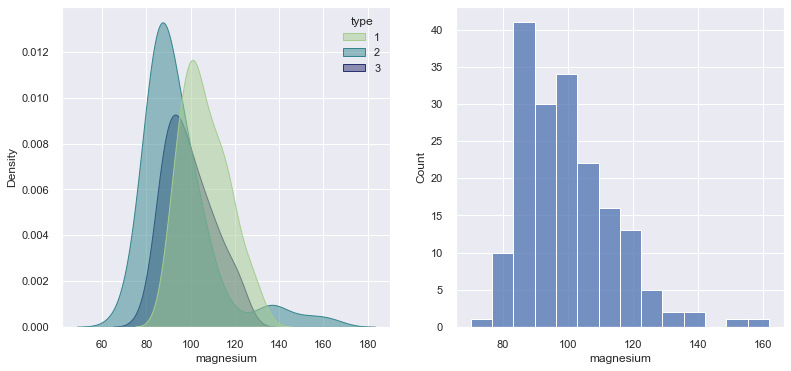

In [212]:
fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)

# Distribution of magnesium content by class
sns.kdeplot(data = df, x = "magnesium", hue = "type", fill = True, palette="crest", alpha = 0.5, ax = ax1)
# Distribution of magnesium content
sns.histplot(df['magnesium'], kde = 0, ax = ax2)

Magnesium isn't very distinct between types, this might be the second attribute to go

## Hue
* Type 1
    - 0.0
* Type 2
    - 0.0
* Type 3 
    - -0.3
<br>

Type 3 has less hue content when correlated by flavanoids

<AxesSubplot:xlabel='hue', ylabel='Count'>

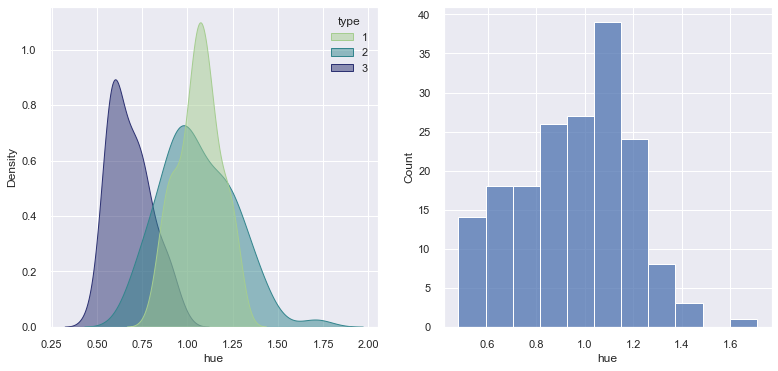

In [213]:
fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)

# Distribution of hue content by class
sns.kdeplot(data = df, x = "hue", hue = "type", fill = True, palette="crest", alpha = 0.5, ax = ax1)
# Distribution of hue content
sns.histplot(df['hue'], kde = 0, ax = ax2)

## Ash
* Type 1
    - 0.0
* Type 2
    - 0.3
* Type 3 
    - 0.3
<br>

Type 1 has less ash content when correlated by flavanoids

<AxesSubplot:xlabel='ash', ylabel='Count'>

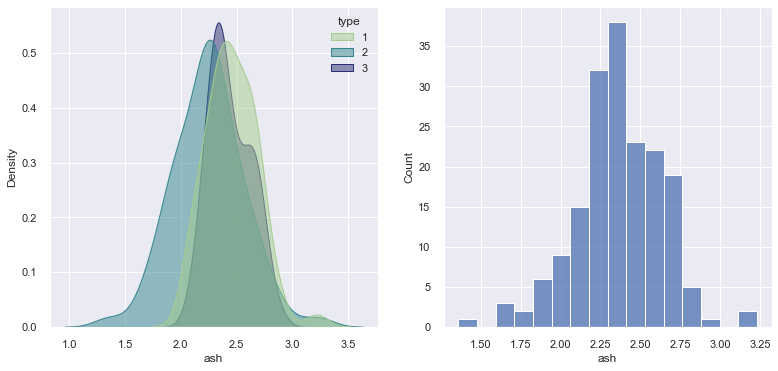

In [214]:
fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)

# Distribution of ash content by class
sns.kdeplot(data = df, x = "ash", hue = "type", fill = True, palette="crest", alpha = 0.5, ax = ax1)
# Distribution of ash content
sns.histplot(df['ash'], kde = 0, ax = ax2)

Ash is very indistinct between types, this might be the third attribute to go

## OD280/OD315
* Type 1
    - -0.1
* Type 2
    - 0.6
* Type 3 
    - -0.4
<br>

All types have distinct od280/od315 contents when correlated by flavanoids

<AxesSubplot:xlabel='od280/od315', ylabel='Count'>

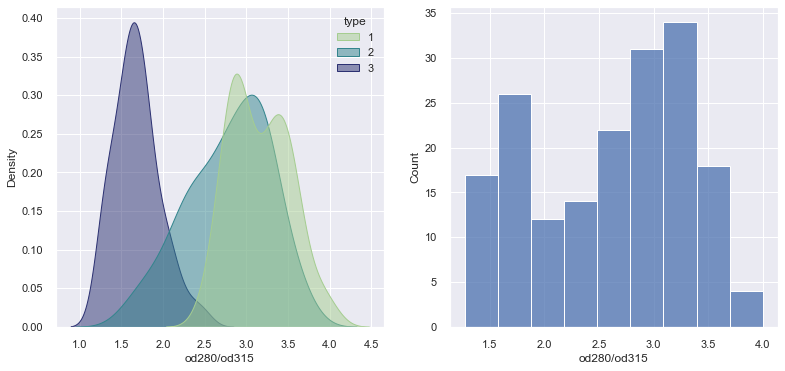

In [215]:
fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)

# Distribution of od280/od315 content by class
sns.kdeplot(data = df, x = "od280/od315", hue = "type", fill = True, palette="crest", alpha = 0.5, ax = ax1)
# Distribution of od280/od315 content
sns.histplot(df['od280/od315'], kde = 0, ax = ax2)

## Nonflavanoid phenols
* Type 1
    - -0.1
* Type 2
    - -0.2
* Type 3 
    - -0.6
<br>

Type 3 has less nonflavanoid phenols content when correlated by flavanoids

<AxesSubplot:xlabel='nonflavanoid phenols', ylabel='Count'>

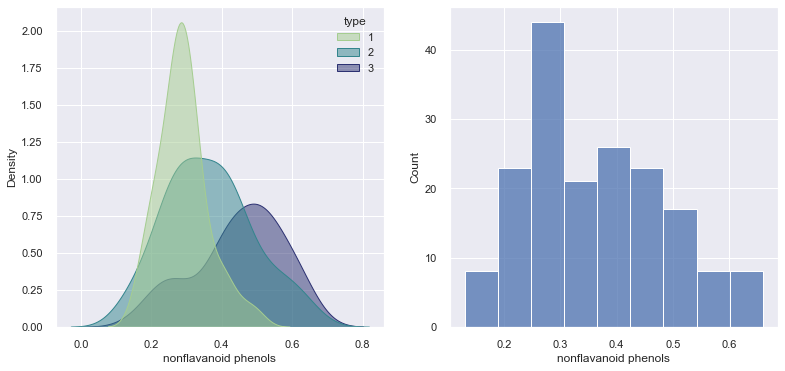

In [216]:
fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)

# Distribution of nonflavanoid phenols content by class
sns.kdeplot(data = df, x = "nonflavanoid phenols", hue = "type", fill = True, palette="crest", alpha = 0.5, ax = ax1)
# Distribution of nonflavanoid phenols content
sns.histplot(df['nonflavanoid phenols'], kde = 0, ax = ax2)

## Malic Acid
* Type 1
    - -0.2
* Type 2
    - 0.1
* Type 3 
    - -0.3
<br>

Type 1 has more malic acid content when correlated by flavanoids

<AxesSubplot:xlabel='malic acid', ylabel='Count'>

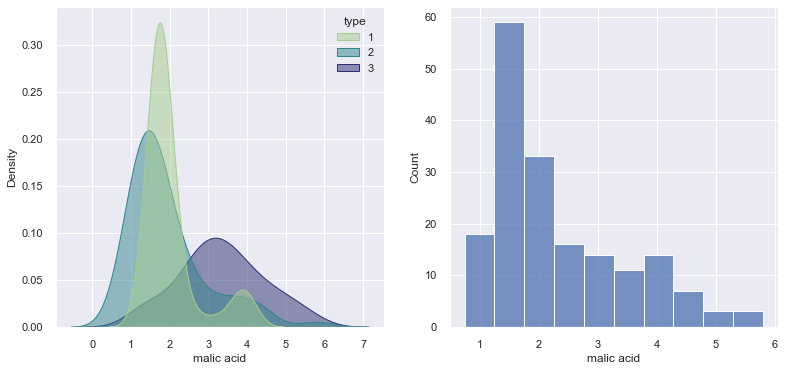

In [217]:
fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)

# Distribution of malic acid phenols content by class
sns.kdeplot(data = df, x = "malic acid", hue = "type", fill = True, palette="crest", alpha = 0.5, ax = ax1)
# Distribution of malic acid content
sns.histplot(df['malic acid'], kde = 0, ax = ax2)

## Alcalinity
* Type 1
    - -0.3
* Type 2
    - 0.3
* Type 3 
    - 0.3
<br>

Type 1 has less alcalinity content when correlated by flavanoids

<AxesSubplot:xlabel='alcalinity', ylabel='Count'>

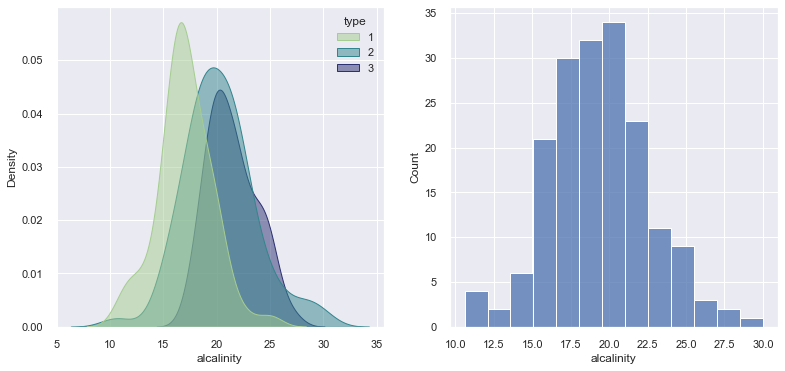

In [218]:
fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)

# Distribution of alcalinity phenols content by class
sns.kdeplot(data = df, x = "alcalinity", hue = "type", fill = True, palette="crest", alpha = 0.5, ax = ax1)
# Distribution of alcalinity content
sns.histplot(df['alcalinity'], kde = 0, ax = ax2)

Proanthocyanins, Magnesium and Ash are all attributes that don't have a distinct difference between types <br>
These attributes will be removed from the dataset when training our algorithm

In [219]:
# Removing the indistinct attributes from our dataframe
df = df.drop(['proanthocyanins', 'magnesium', 'ash'], axis = 1)
df.describe()

,type,alcohol,malic acid,alcalinity,total phenols,flavanoids,nonflavanoid phenols,colour intensity,hue,od280/od315,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,19.494944,2.295112,2.029270,0.361854,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,3.339564,0.625851,0.998859,0.124453,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,10.600000,0.980000,0.340000,0.130000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,17.200000,1.742500,1.205000,0.270000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,19.500000,2.355000,2.135000,0.340000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,21.500000,2.800000,2.875000,0.437500,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,30.000000,3.880000,5.080000,0.660000,13.000000,1.710000,4.000000,1680.000000


<br>

# Test and Train Split

***

In [220]:
# Split the data frame in two
import sklearn.model_selection as mod

train, test = mod.train_test_split(df)

In [221]:
# Describing train
print(len(train), 'samples in training data')
train.describe()

133 samples in training data


,type,alcohol,malic acid,alcalinity,total phenols,flavanoids,nonflavanoid phenols,colour intensity,hue,od280/od315,proline
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,1.932331,13.003008,2.286090,19.228571,2.295414,2.044887,0.353459,5.183158,0.961624,2.603233,763.669173
std,0.780399,0.834226,1.091642,3.219862,0.633622,1.013763,0.117435,2.423142,0.229846,0.710148,322.227844
min,1.000000,11.450000,0.890000,10.600000,1.100000,0.470000,0.130000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.290000,1.570000,17.000000,1.720000,1.100000,0.270000,3.250000,0.770000,1.860000,510.000000
50%,2.000000,13.050000,1.810000,19.100000,2.400000,2.170000,0.340000,4.900000,0.990000,2.780000,675.000000
75%,3.000000,13.710000,2.890000,21.000000,2.800000,2.910000,0.430000,6.300000,1.120000,3.170000,1035.000000
max,3.000000,14.830000,5.800000,30.000000,3.880000,5.080000,0.630000,13.000000,1.450000,4.000000,1680.000000


In [222]:
# Describing Test
print(len(test), 'samples in test data')
test.describe()

45 samples in test data


,type,alcohol,malic acid,alcalinity,total phenols,flavanoids,nonflavanoid phenols,colour intensity,hue,od280/od315,proline
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,1.955556,12.993556,2.484889,20.282222,2.294222,1.983111,0.386667,4.688444,0.945111,2.636667,697.311111
std,0.767391,0.750573,1.189613,3.593510,0.609286,0.963061,0.141742,1.953987,0.226872,0.716951,289.936813
min,1.000000,11.030000,0.740000,11.200000,0.980000,0.340000,0.170000,1.740000,0.580000,1.300000,312.000000
25%,1.000000,12.470000,1.730000,17.500000,1.880000,1.280000,0.260000,3.080000,0.810000,2.010000,466.000000
50%,2.000000,13.050000,1.900000,20.000000,2.320000,2.040000,0.370000,4.500000,0.920000,2.780000,660.000000
75%,3.000000,13.500000,3.430000,22.500000,2.640000,2.760000,0.520000,5.650000,1.090000,3.160000,880.000000
max,3.000000,14.370000,5.190000,28.500000,3.850000,3.750000,0.660000,8.900000,1.710000,3.820000,1480.000000


<AxesSubplot:title={'center':'Training data'}, xlabel='flavanoids', ylabel='Density'>

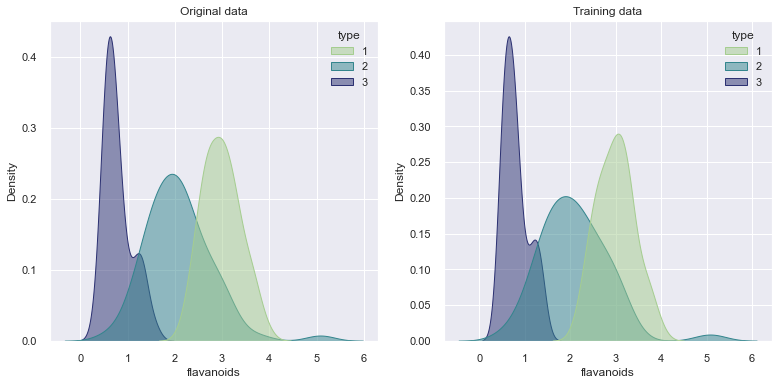

In [223]:
# Graphing the train data and original data
fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)

# Original Data
ax1.set_title('Original data')
sns.kdeplot(data = df, x = "flavanoids", hue = "type", fill = True, palette="crest", alpha = 0.5, ax = ax1)
# Training Data
ax2.set_title('Training data')
sns.kdeplot(data = train, x = "flavanoids", hue = "type", fill = True, palette="crest", alpha = 0.5, ax = ax2)

Training data seems to be similar here. Now to split the train dataframe into inputs and outputs for our classifier

<br>

# Inputs and Outputs

***

In [224]:
#Setting up the inputs and outputs
inputs, outputs = train[['alcohol', 'malic acid', 'alcalinity', 'total phenols',
       'flavanoids', 'nonflavanoid phenols', 'colour intensity', 'hue',
       'od280/od315', 'proline']], train['type']

In [225]:
# Describing inputs
inputs.head()

,alcohol,malic acid,alcalinity,total phenols,flavanoids,nonflavanoid phenols,colour intensity,hue,od280/od315,proline
168,13.58,2.58,24.5,1.55,0.84,0.39,8.66,0.74,1.80,750
75,11.66,1.88,16.0,1.61,1.57,0.34,3.80,1.23,2.14,428
175,13.27,4.28,20.0,1.59,0.69,0.43,10.20,0.59,1.56,835
8,14.83,1.64,14.0,2.80,2.98,0.29,5.20,1.08,2.85,1045
119,12.00,3.43,19.0,2.00,1.64,0.37,1.28,0.93,3.05,564


In [226]:
# Describing outputs
outputs.head()

168    3
75     2
175    3
8      1
119    2
Name: type, dtype: int64

<br>

# LinearSVC Classification

***

In [227]:
# Importing our classifier
from sklearn.svm import SVC

# Creating our classifier
classifier = SVC(kernel = 'linear', random_state = 0)
# Training the classifier on our data
classifier.fit(inputs,outputs)

SVC(kernel='linear', random_state=0)

In [228]:
# Asking the classifier to classify the test data
predictions = classifier.predict(test[['alcohol', 'malic acid', 'alcalinity', 'total phenols',
       'flavanoids', 'nonflavanoid phenols', 'colour intensity', 'hue',
       'od280/od315', 'proline']])
predictions

array([3, 2, 3, 2, 2, 1, 2, 3, 2, 2, 1, 3, 3, 1, 1, 2, 2, 1, 3, 3, 2, 3,
       1, 2, 3, 2, 2, 1, 3, 2, 1, 3, 2, 2, 1, 3, 2, 1, 1, 3, 1, 1, 3, 1,
       2], dtype=int64)

In [229]:
predictions == test['type']

146     True
95      True
163     True
89      True
68      True
3       True
85      True
138     True
122     True
71      True
49      True
118    False
152     True
1       True
28      True
105     True
72      True
43      True
155     True
135     True
81      True
83     False
44      True
88      True
150     True
129     True
115     True
42      True
139     True
108     True
20      True
162     True
113     True
111     True
24      True
157     True
98      True
26      True
12      True
165     True
55      True
21      True
169     True
32      True
127     True
Name: type, dtype: bool

In [231]:
# What proportions were correct?
classifier.score(test[['alcohol', 'malic acid', 'alcalinity', 'total phenols',
       'flavanoids', 'nonflavanoid phenols', 'colour intensity', 'hue',
       'od280/od315', 'proline']], test['type'])

0.9555555555555556

Our classifier (LinearSVC) ended with an accuracy of 95.5% <br>
This classifier has 95.5% to accurately predict the type of wine

<br>

# End of LinearSVC - Support Vector Machine Algorithm

***